In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [2]:
!curl -O https://lazyprogrammer.me/course_files/airline_passengers.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2036  100  2036    0     0   1905      0  0:00:01  0:00:01 --:--:--  1911
100  2036  100  2036    0     0   1903      0  0:00:01  0:00:01 --:--:--  1909


In [4]:
df=pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

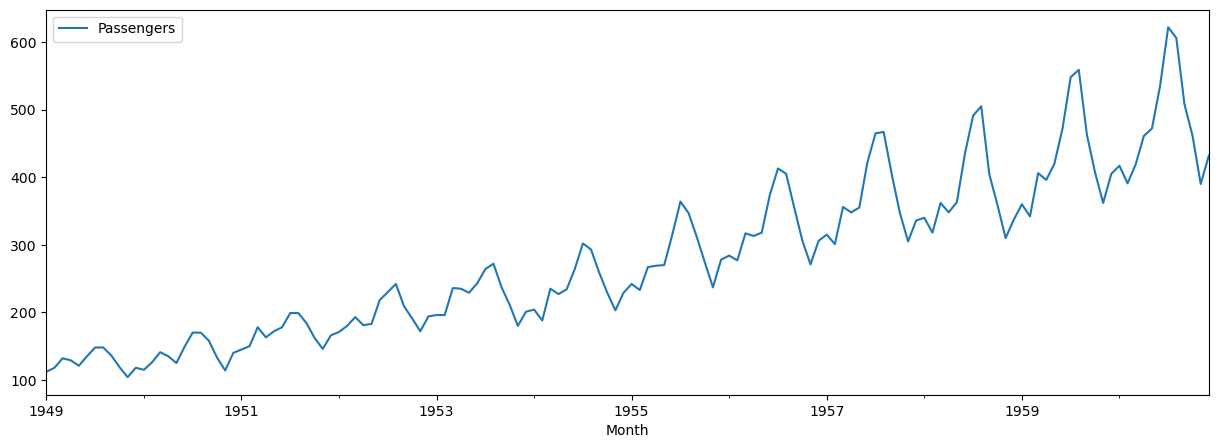

In [5]:
df.plot(figsize=(15,5))

In [7]:
df['1stdiff']=df['Passengers'].diff()

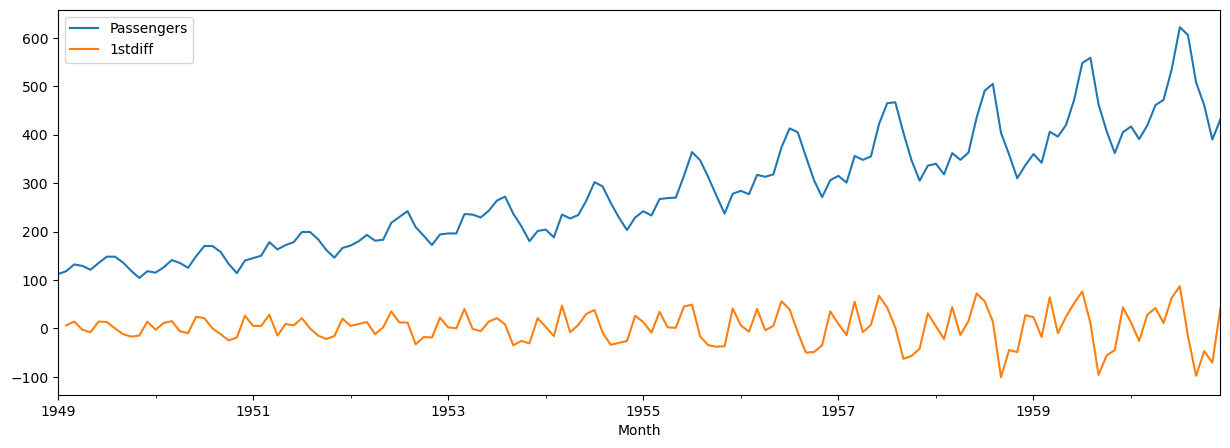

In [8]:
df.plot(figsize=(15,5));

In [9]:
df['LogPassengers']=np.log(df['Passengers'])

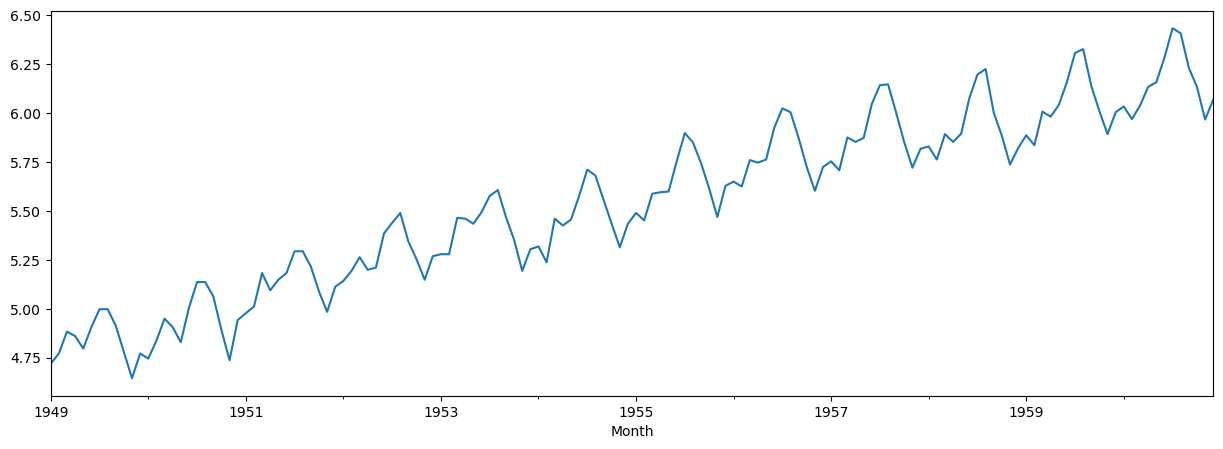

In [10]:
df['LogPassengers'].plot(figsize=(15,5));

In [11]:
from statsmodels.tsa.arima.model import ARIMA

In [12]:
df.index.freq='MS'

In [13]:
Ntest=12
train=df.iloc[:-Ntest]
test=df.iloc[-Ntest:]

In [14]:
train_idx=df.index<=train.index[-1]
test_idx=df.index>train.index[-1]

In [15]:
arima=ARIMA(train['Passengers'],order=(1,0,0))

In [17]:
arima_result=arima.fit()

In [18]:
df.loc[train_idx,'AR(1)']=arima_result.predict(start=train.index[0],end=train.index[-1])

<Axes: xlabel='Month'>

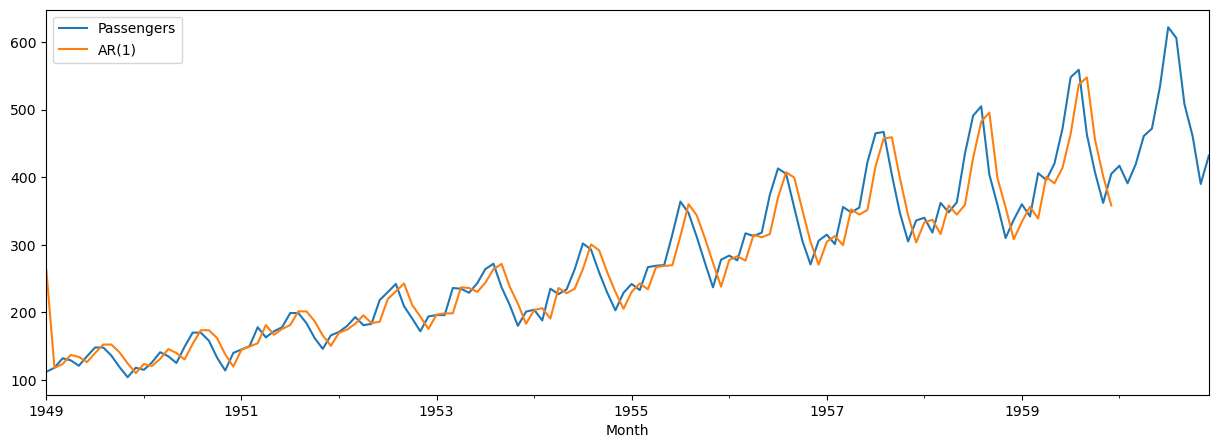

In [19]:
df[['Passengers','AR(1)']].plot(figsize=(15,5))

In [20]:
prediction_result=arima_result.get_forecast(Ntest)
forecast=prediction_result.predicted_mean
df.loc[test_idx,'AR(1)']=forecast

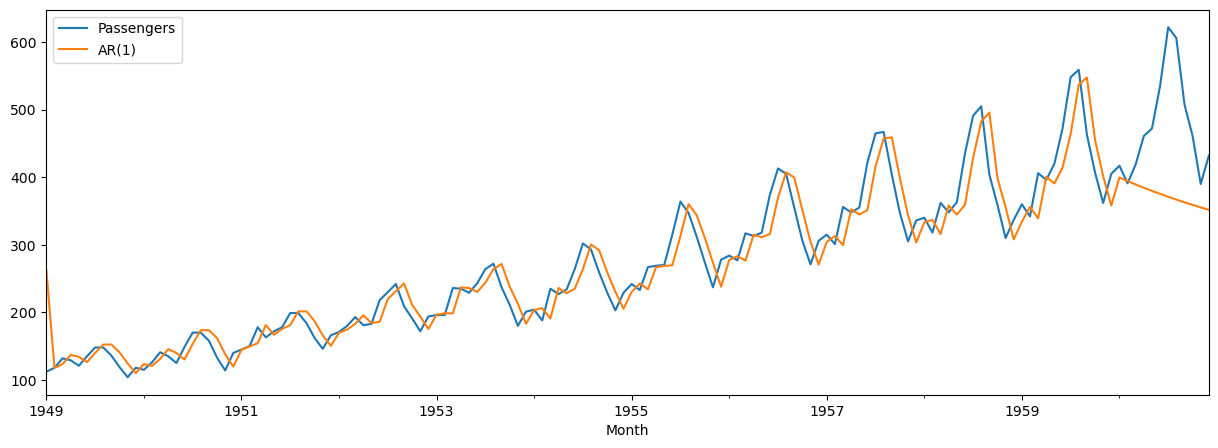

In [21]:
df[['Passengers','AR(1)']].plot(figsize=(15,5));

In [22]:
# Explore Prediction results further
type(prediction_result)

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

In [23]:
# Confidence Interval
prediction_result.conf_int()

,lower Passengers,upper Passengers
1960-01-01,338.658210,460.451500
1960-02-01,309.826171,478.809354
1960-03-01,287.732168,490.829380
1960-04-01,269.338255,499.534230
1960-05-01,253.432283,506.121348
1960-06-01,239.373402,511.217438
1960-07-01,226.768868,515.201639
1960-08-01,215.354569,518.324977
1960-09-01,204.941150,520.764225
1960-10-01,195.386336,522.649551


In [24]:
def plot_fit_and_forecast(result):
    fig,ax=plt.subplots(figsize=(15,5))
    ax.plot(df['Passengers'],label='data')
    
    # plot the curve fitted on train set
    train_pred=result.fittedvalues
    ax.plot(train.index,train_pred,color='green',label='fitted')
    
    # Forecast the test set
    prediction_result = result.get_forecast(Ntest)
    conf_int=prediction_result.conf_int()
    lower,upper=conf_int['lower Passengers'],conf_int['upper Passengers']
    forecast=prediction_result.predicted_mean
    ax.plot(test.index,forecast,label='forecast')
    ax.fill_between(test.index,lower,upper,color='red',alpha=0.3)
    ax.legend()  

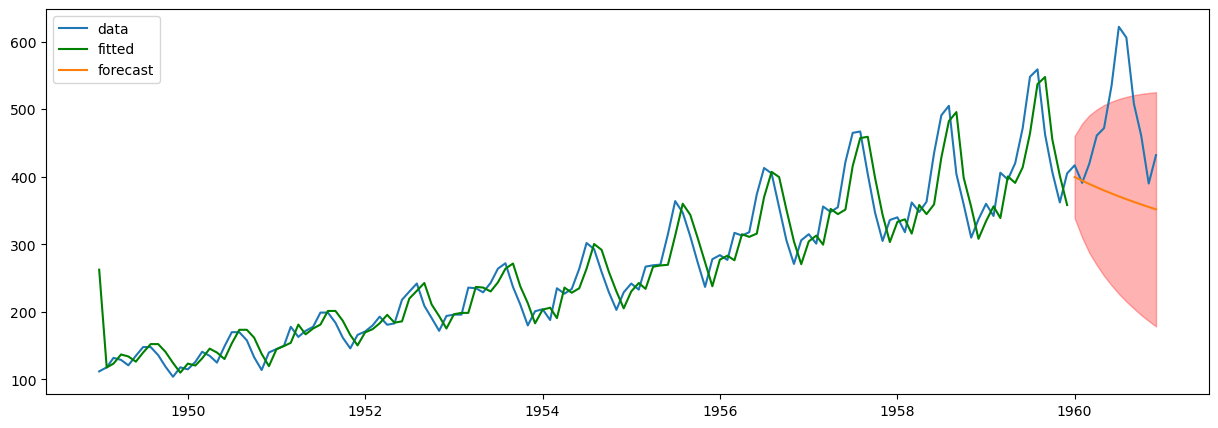

In [25]:
plot_fit_and_forecast(arima_result)

C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


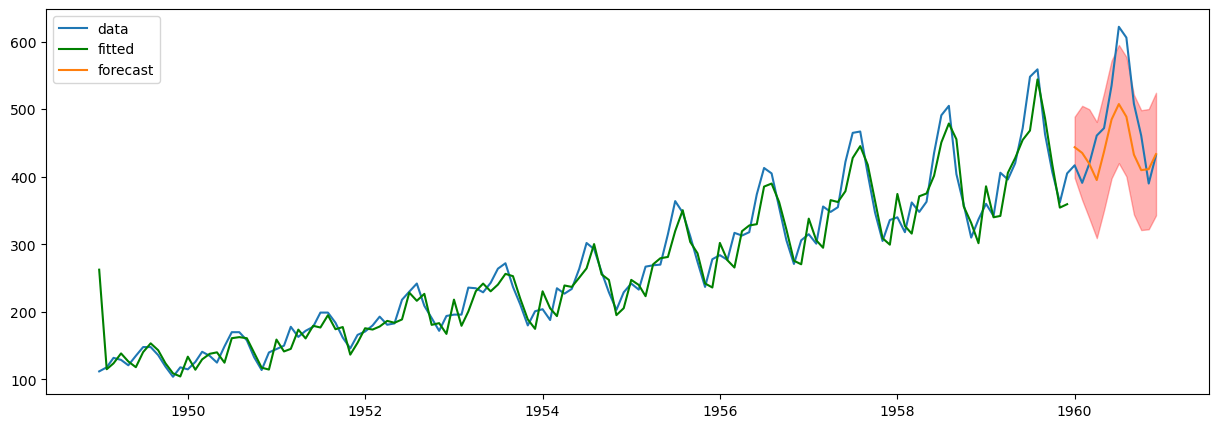

In [28]:
arima=ARIMA(train['Passengers'],order=(10,0,0)) # AR10
arima_result=arima.fit()
plot_fit_and_forecast(arima_result)

C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


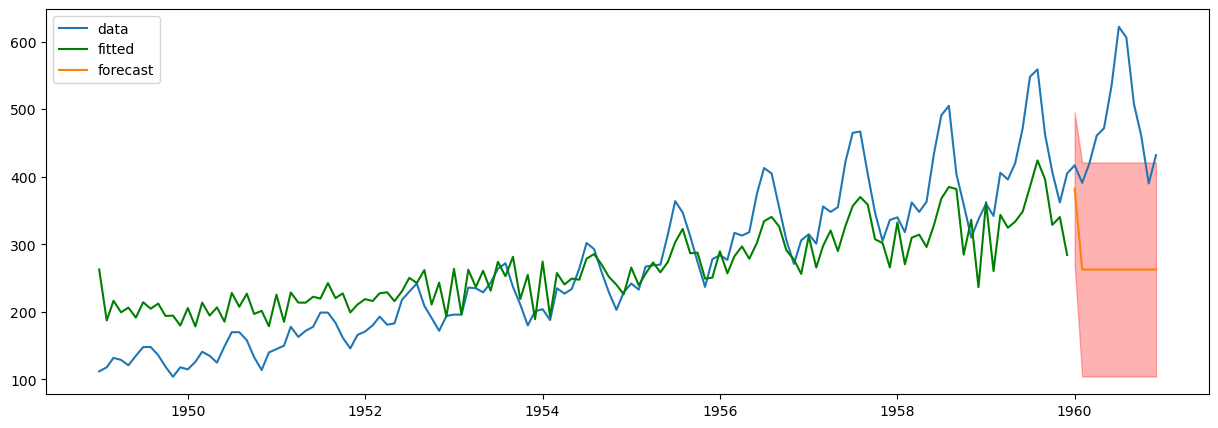

In [27]:
arima=ARIMA(train['Passengers'],order=(0,0,1)) #MA(1)
arima_result=arima.fit()
plot_fit_and_forecast(arima_result)

In [29]:
df['Log1stDiff'] =df['LogPassengers'].diff()

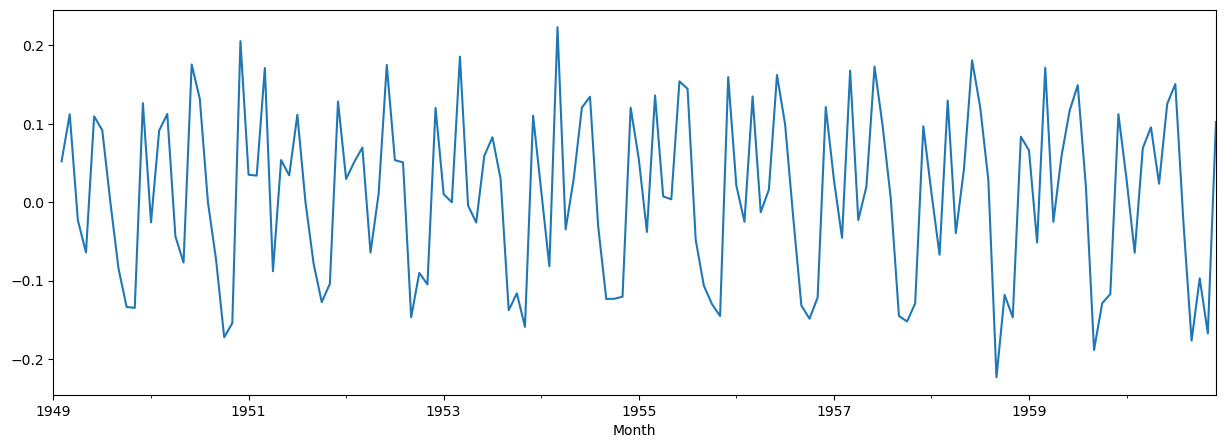

In [30]:
df['Log1stDiff'].plot(figsize=(15,5));

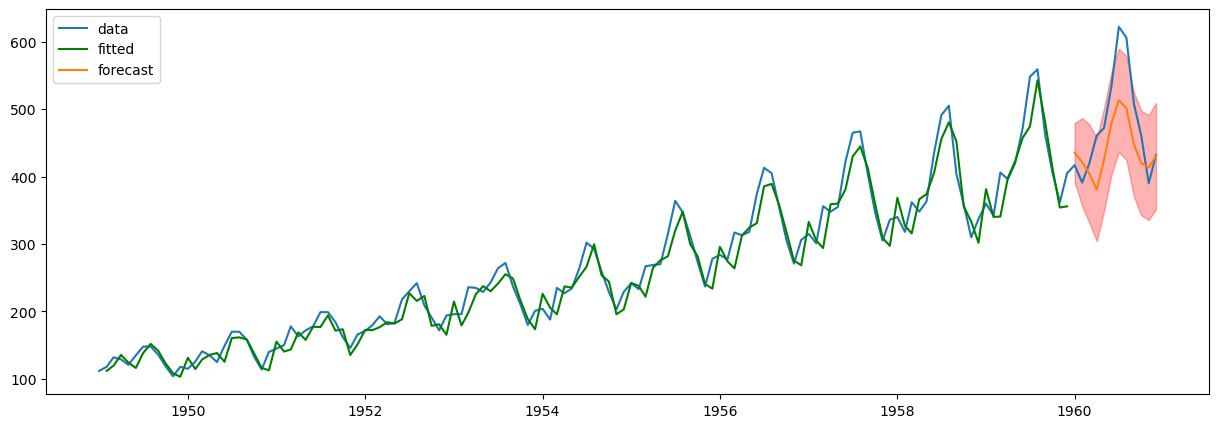

In [35]:
arima=ARIMA(train['Passengers'],order=(8,1,1))
arima_result_811=arima.fit()

def plot_fit_and_forecast_int(result,d,col='Passengers'):
    fig,ax=plt.subplots(figsize=(15,5))
    ax.plot(df[col],label='data')
    
    # Plot the curve fitted on train set
    train_pred=result.predict(start=train.index[d],end=train.index[-1])
    
    ax.plot(train.index[d:],train_pred,color='green',label='fitted')
    
    #forecast the test set
    prediction_result=result.get_forecast(Ntest)
    conf_int=prediction_result.conf_int()
    lower,upper= conf_int[f'lower {col}'],conf_int[f'upper {col}']
    forecast = prediction_result.predicted_mean
    ax.plot(test.index,forecast,label='forecast')
    ax.fill_between(test.index,lower,upper,color='red',alpha=0.3)
    ax.legend()
    
plot_fit_and_forecast_int(arima_result_811,1)                                       
                                                  

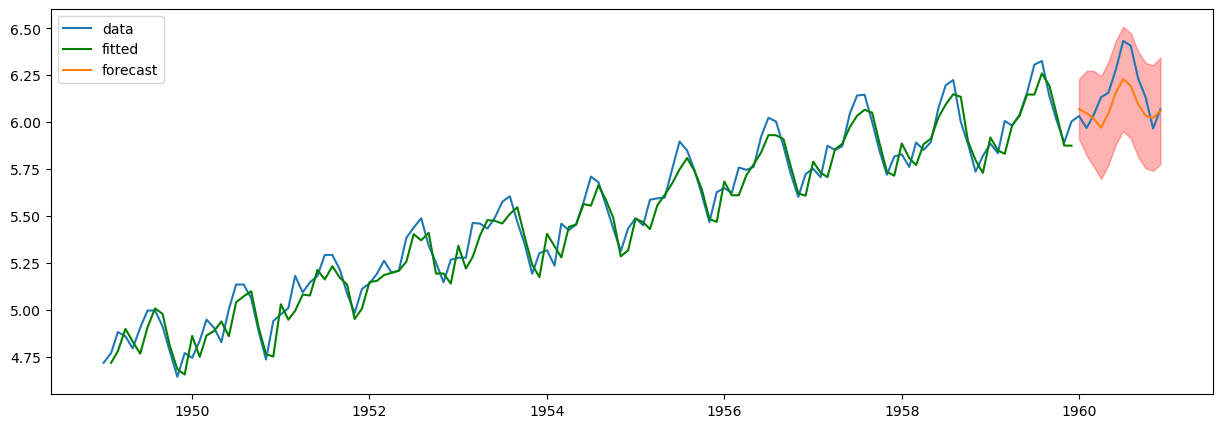

In [38]:
arima=ARIMA(train['LogPassengers'],order=(8,1,1))
arima_result_log811=arima.fit()
plot_fit_and_forecast_int(arima_result_log811,1,col='LogPassengers')

C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


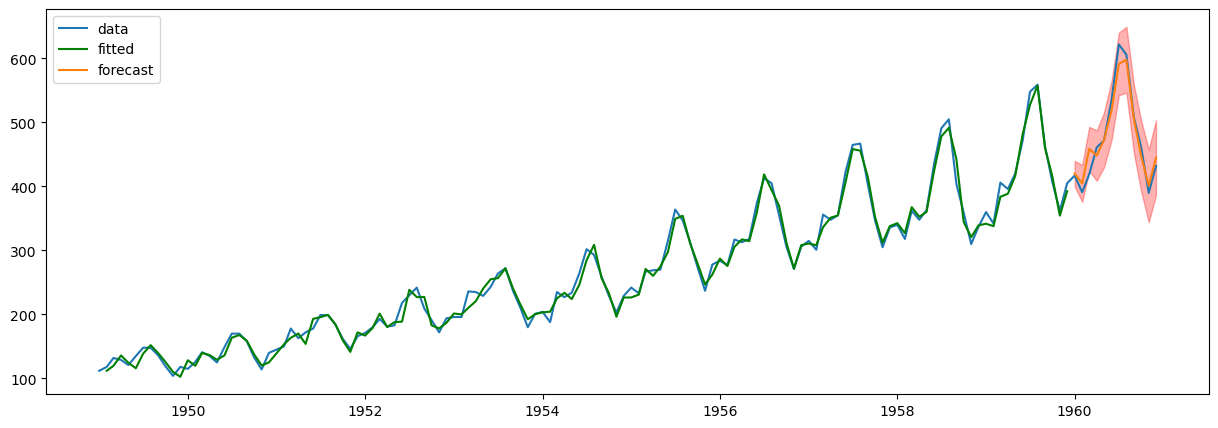

In [41]:
arima=ARIMA(train['Passengers'],order=(12,1,0))
arima_result_1210=arima.fit()
plot_fit_and_forecast_int(arima_result_1210,1,col='Passengers')

C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


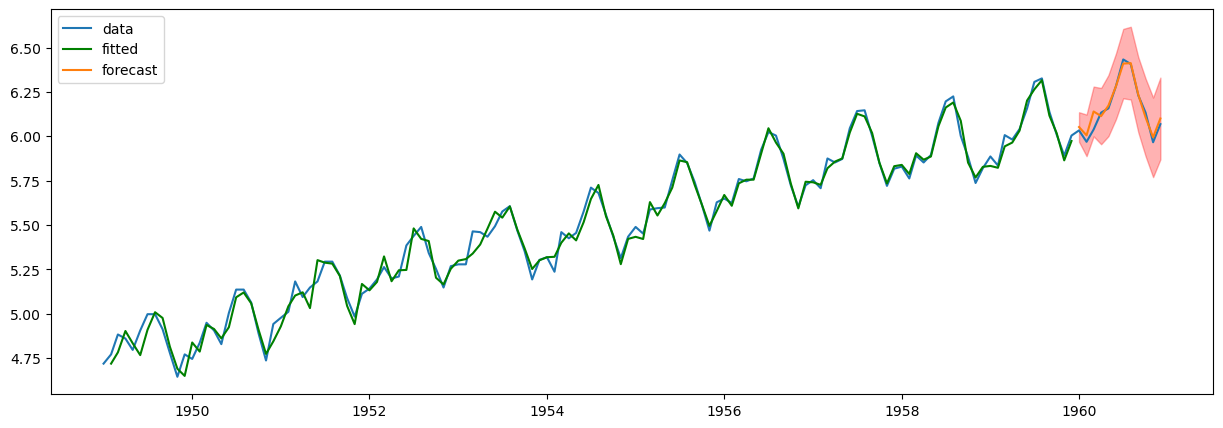

In [42]:
arima=ARIMA(train['LogPassengers'],order=(12,1,0))
arima_result_log1210=arima.fit()
plot_fit_and_forecast_int(arima_result_log1210,1,col='LogPassengers')

In [43]:
def rmse(result,is_logged):
    forecast=result.forecast(Ntest)
    if is_logged:
        forecast=np.exp(forecast)
    
    t=test['Passengers']
    y=forecast
    return np.sqrt(np.mean((t-y)**2))

In [45]:
print("ARIMA(8,1,1):",rmse(arima_result_811,False))
print("ARIMA(8,1,1) logged:",rmse(arima_result_log811,True))
print("ARIMA(12,0,1):",rmse(arima_result_1210,False))
print("ARIMA(12,0,1) logged:",rmse(arima_result_log1210,True))

ARIMA(8,1,1): 59.064589931580045
ARIMA(8,1,1) logged: 61.601011265928896
ARIMA(12,0,1): 17.492095282676104
ARIMA(12,0,1) logged: 16.106178864187097
